In [40]:
%run ../StatTest2_WithSimulation_Setup.ipynb

{0: ['ME', 'IL', 'PA', 'GA', 'OK', 'DE', 'WA', 'CT', 'OH', 'VA', 'NE', 'MT', 'IN', 'CA', 'HI', 'ND', 'MD', 'SC', 'RI', 'AK', 'KY', 'WI', 'LA', 'MN', 'MS', 'WV', 'FL'], 1: ['SD', 'IL', 'PA', 'NH', 'NM', 'NV', 'OK', 'UT', 'CT', 'OH', 'VA', 'OR', 'CO', 'IN', 'HI', 'AL', 'RI', 'AK', 'LA', 'MN', 'IA', 'AR', 'WV'], 2: ['MI', 'ME', 'WY', 'DC', 'TX', 'AZ', 'NC', 'WA', 'OR', 'CO', 'MT', 'ND', 'TN', 'SC', 'AL', 'NY', 'KY', 'NJ', 'KS', 'ID', 'IA', 'AR', 'MO'], 3: ['MI', 'SD', 'WY', 'NH', 'DC', 'TX', 'GA', 'AZ', 'NM', 'NC', 'NV', 'DE', 'UT', 'NE', 'CA', 'MD', 'TN', 'NY', 'NJ', 'KS', 'WI', 'ID', 'MS', 'FL', 'MO']}
{0: ['MI', 'SD', 'WY', 'NH', 'DC', 'TX', 'AZ', 'NM', 'NC', 'NV', 'UT', 'OR', 'CO', 'TN', 'AL', 'NY', 'NJ', 'KS', 'ID', 'IA', 'AR', 'MO'], 1: ['MI', 'ME', 'WY', 'DC', 'TX', 'GA', 'AZ', 'NC', 'DE', 'WA', 'NE', 'MT', 'CA', 'ND', 'MD', 'TN', 'SC', 'NY', 'KY', 'NJ', 'KS', 'WI', 'ID', 'MS', 'FL', 'MO'], 2: ['SD', 'IL', 'PA', 'NH', 'GA', 'NM', 'NV', 'OK', 'DE', 'UT', 'CT', 'OH', 'VA', 'NE', 'IN'

In [2]:
data2014 = pd.read_csv("../0-Our_Dataset/2014dataset.csv")
data2015 = pd.read_csv("../0-Our_Dataset/2015dataset.csv")
data2016 = pd.read_csv("../0-Our_Dataset/2016dataset.csv")
data2017 = pd.read_csv("../0-Our_Dataset/2017dataset.csv")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,52,323,649,882,932,1092,1202) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,57,204,341,376,377,396,430,431,928,944,1006,1013,1151,1160,1169,1179,1411) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,17,163,355,406,702,835,847,1083,1156,1183,1185,1200) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Create the labels.
# By index:
# label 2 is transfers
# label 3 is premiums
# label 4 is costs
# label 5 is member months
# label 6 is reinsurance (individual group only)

ind_labels_14 = ["HIOS ID", "HIOS INPUTTED INSURANCE COMPANY NAME",
                  "HHS RISK ADJUSTMENT TRANSFER AMOUNT (INDIVIDUAL MARKET, INCLUDING CATASTROPHIC)",
                  "1.1Directpremiumwritten2HealthInsuranceINDIVIDUALTotalasof3/31/15",
                  "2.16Totalincurredclaims2HealthInsuranceINDIVIDUALTotalasof3/31/15",
                  "7.4Membermonths2HealthInsuranceINDIVIDUALTotalasof3/31/15",
                  "STATE", "REINSURANCE PAYMENT AMOUNT (OR NOT ELIGIBLE)"] # no more reinsurance as of 2017
ind_labels_15 = [label.replace('15', '16') for label in ind_labels_14]
ind_labels_16 = [label.replace('15', '17') for label in ind_labels_14]
ind_labels_17 = [label.replace('15', '18') for label in ind_labels_14][:-1]

sg_labels_14 = ["HIOS ID", "HIOS INPUTTED INSURANCE COMPANY NAME",
                 "HHS RISK ADJUSTMENT TRANSFERS AMOUNT (SMALL GROUP MARKET)",
                  "1.1Directpremiumwritten7HealthInsuranceSMALLGROUPTotalasof3/31/15",
                  "2.16Totalincurredclaims7HealthInsuranceSMALLGROUPTotalasof3/31/15",
                  "7.4Membermonths7HealthInsuranceSMALLGROUPTotalasof3/31/15", "STATE"]
sg_labels_15 = [label.replace('15', '16') for label in sg_labels_14]
sg_labels_16 = [label.replace('15', '17') for label in sg_labels_14]
sg_labels_17 = [label.replace('15', '18') for label in sg_labels_14]

In [4]:
# Filter the data to include only the fields we want

ind_data_14 = data2014[ind_labels_14].dropna()
ind_data_15 = data2015[ind_labels_15].dropna()
ind_data_16 = data2016[ind_labels_16].dropna()
ind_data_17 = data2017[ind_labels_17].dropna()
sg_data_14 = data2014[sg_labels_14].dropna()
sg_data_15 = data2015[sg_labels_15].dropna()
sg_data_16 = data2016[sg_labels_16].dropna()
sg_data_17 = data2017[sg_labels_17].dropna()

In [5]:
# Drop companies with <2000 MM
ind_data_14 = ind_data_14.where(ind_data_14[ind_labels_14[5]] > 2000).dropna()
ind_data_15 = ind_data_15.where(ind_data_15[ind_labels_15[5]] > 2000).dropna()
ind_data_16 = ind_data_16.where(ind_data_16[ind_labels_16[5]] > 2000).dropna()
ind_data_17 = ind_data_17.where(ind_data_17[ind_labels_17[5]] > 2000).dropna()
sg_data_14 = sg_data_14.where(sg_data_14[sg_labels_14[5]] > 2000).dropna()
sg_data_15 = sg_data_15.where(sg_data_15[sg_labels_15[5]] > 2000).dropna()
sg_data_16 = sg_data_16.where(sg_data_16[sg_labels_16[5]] > 2000).dropna()
sg_data_17 = sg_data_17.where(sg_data_17[sg_labels_17[5]] > 2000).dropna()

In [6]:
# Calculate transfers, premiums, costs, and reinsurance (if individual group) per member month
def calculate_pmm(df, df_labels, group):
    df["MM"] = df[df_labels[5]]
    df["Transfers"] = df[df_labels[2]]
    df["TotalCosts"] = abs(df[df_labels[4]])
    df["Enrollees"] = df["MM"] / 12
    df["TransfersPerEnrollee"] = df["Transfers"] / df["Enrollees"]
    df["TransfersPerSqrtEnrollee"] = df["Transfers"] / np.sqrt(df["Enrollees"])
    df["LogEnrollees"] = np.log(df["Enrollees"])
    df["LogTransfers"] = np.log(df["Transfers"]**2 + 1)
    df["TransfersPMM"] = df[df_labels[2]] / df[df_labels[5]]
    df["PremiumsPMM"] = abs(df[df_labels[3]] / df[df_labels[5]])
    df["CostsPMM"] = abs(df[df_labels[4]] / df[df_labels[5]])
    if group == "i":
        df["ReinsurancePMM"] = df[df_labels[7]] / df[df_labels[5]]
        df["ProfitsPMM"] = df["PremiumsPMM"] - df["CostsPMM"] + df["TransfersPMM"] + df["ReinsurancePMM"]
        #df["PremMinusCostsPlusReinsurancePMM"] = df["PremiumsPMM"] - df["CostsPMM"] + df["ReinsurancePMM"]
    elif group == "sg":
        df["ProfitsPMM"] = df["PremiumsPMM"] - df["CostsPMM"] + df["TransfersPMM"]
    df["PremMinusCostsPMM"] = df["PremiumsPMM"] - df["CostsPMM"]
    df["PremMinusCostsPlusTransfersPMM"] = df["PremiumsPMM"] - df["CostsPMM"] + df["TransfersPMM"]
    df["SicknessPMM"] = df["CostsPMM"] - df["PremiumsPMM"]
    average_sickness = np.mean(df["SicknessPMM"])
    df["ExcessSicknessPMM"] = df["SicknessPMM"] - average_sickness
    return df

ind_data_14 = calculate_pmm(ind_data_14, ind_labels_14, "i")
ind_data_15 = calculate_pmm(ind_data_15, ind_labels_15, "i")
ind_data_16 = calculate_pmm(ind_data_16, ind_labels_16, "i")
ind_data_17 = calculate_pmm(ind_data_17, ind_labels_17, "sg")
sg_data_14 = calculate_pmm(sg_data_14, sg_labels_14, "sg")
sg_data_15 = calculate_pmm(sg_data_15, sg_labels_15, "sg")
sg_data_16 = calculate_pmm(sg_data_16, sg_labels_16, "sg")
sg_data_17 = calculate_pmm(sg_data_17, sg_labels_17, "sg")

In [7]:
# Combine the dataframes by left merging

ind_data = ind_data_14.merge(ind_data_15, on='HIOS ID', how='outer', suffixes=('_14', '_15'))\
.merge(ind_data_16, on='HIOS ID', how='outer').merge(ind_data_17, on='HIOS ID', how='outer', suffixes=('_16', '_17'))

In [8]:
# Do the same thing for small group

sg_data = sg_data_14.merge(sg_data_15, on='HIOS ID', how='outer', suffixes=('_14', '_15'))\
.merge(sg_data_16, on='HIOS ID', how='outer').merge(sg_data_17, on='HIOS ID', how='outer', suffixes=('_16', '_17'))

In [9]:
states = list(set(sg_data_14["STATE"]))
print(states)
dfs = [sg_data_14, sg_data_15, sg_data_16, sg_data_17]

In [41]:
dfs_new, empirical_transfers_sum = normalize_empirical_data_to_avg_2017_dollars(dfs, states)

Cbar is 4398.953
PA 14 Ratio is 1.105
WI 14 Ratio is 1.127
OR 14 Ratio is 1.208
NV 14 Ratio is 1.365
FL 14 Ratio is 1.199
VA 14 Ratio is 1.250
NY 14 Ratio is 0.973
AZ 14 Ratio is 1.497
GA 14 Ratio is 1.260
CO 14 Ratio is 1.203
MI 14 Ratio is 1.308
ME 14 Ratio is 1.188
CA 14 Ratio is 1.154
MO 14 Ratio is 1.414
OH 14 Ratio is 1.264
NM 14 Ratio is 1.142
CT 14 Ratio is 0.990
NE 14 Ratio is 1.265
HI 14 Ratio is 1.175
MN 14 Ratio is 1.182
AR 14 Ratio is 1.473
NJ 14 Ratio is 1.173
MD 14 Ratio is 1.238
WA 14 Ratio is 1.199
UT 14 Ratio is 1.628
PA 15 Ratio is 1.072
WI 15 Ratio is 1.099
OR 15 Ratio is 1.138
NV 15 Ratio is 1.302
FL 15 Ratio is 1.162
VA 15 Ratio is 1.269
NY 15 Ratio is 0.896
AZ 15 Ratio is 1.404
GA 15 Ratio is 1.199
CO 15 Ratio is 1.185
MI 15 Ratio is 1.250
ME 15 Ratio is 1.184
CA 15 Ratio is 1.117
MO 15 Ratio is 1.282
OH 15 Ratio is 1.191
NM 15 Ratio is 1.108
CT 15 Ratio is 0.977
NE 15 Ratio is 1.189
HI 15 Ratio is 1.086
MN 15 Ratio is 1.156
AR 15 Ratio is 1.407
NJ 15 Ratio is 1.

In [11]:
for df_temp in dfs_new:
    df_temp["TransfersNormalizedPerSqrtEnrollee"] = df_temp["TransfersNormalized"] / np.sqrt(df_temp["Enrollees"])

In [12]:
start_cost_matrix = time.time()

stateyear_to_df = dict()
stateyear_to_random = dict()
    
sum_sqrt_a = 0
cost_matrix_sum = 0
df_sum = 0
for current_state in states:
    for df_index in range(4):
        label = current_state + df_index_to_year[df_index]
        this_df = state(dfs[df_index], current_state)
        if len(this_df) > 0:
            sum_n = sum(this_df["Enrollees"])
            this_df["sum_n_minus_n_i"] = sum_n - this_df["Enrollees"]
            this_df["a"] = this_df["Enrollees"] * (this_df["sum_n_minus_n_i"] / sum_n)**2 + this_df["sum_n_minus_n_i"] * (this_df["Enrollees"] / sum_n)**2
            this_df["sqrt_a"] = np.sqrt(this_df["a"])
            
            cost_matrix = [np.random.normal(0, sqrta, 10**5) for sqrta in this_df["sqrt_a"]]
            cost_matrix_sum = cost_matrix_sum + len(cost_matrix)
            df_sum = df_sum + len(this_df["sqrt_a"])
            sum_sqrt_a = sum_sqrt_a + sum(this_df["sqrt_a"])
            #this_df["sim_distr"] = np.random.normal(0, this_df["sqrt_a"], 10000)
            stateyear_to_df[label] = this_df
            stateyear_to_random[label] = np.array(cost_matrix)
end_cost_matrix = time.time()
            
print(cost_matrix_sum)
print(df_sum)
print("Executed in %.3f s" % (end_cost_matrix - start_cost_matrix))

1233
1233
Executed in 13.419 s


In [13]:
lab = "TransfersNormalizedPerSqrtEnrollee"


abs_empirical_di = np.absolute(np.concatenate((np.array(dfs_new[0][lab]),
                                               np.array(dfs_new[1][lab]),
                                               np.array(dfs_new[2][lab]),
                                               np.array(dfs_new[3][lab]))))
sorted_abs_empirical_di = np.sort(abs_empirical_di)

In [15]:
beta = 40000
pval = 0.01
big_j = 10**5
k = len(sorted_abs_empirical_di)
all_transfers, all_di = apr_test_imbalances_2017(stateyear_to_df, stateyear_to_random, beta, k, big_j)

0 iterations completed in 0.3 s
100 iterations completed in 17.6 s
200 iterations completed in 15.7 s
300 iterations completed in 15.5 s
400 iterations completed in 16.0 s
500 iterations completed in 17.0 s
600 iterations completed in 15.9 s
700 iterations completed in 16.6 s
800 iterations completed in 18.6 s
900 iterations completed in 19.0 s


In [16]:
np.save("competitive_states_simulated_transfers.npy", all_transfers)
np.save("competitive_states_simulated_transfers_over_sqrtn.npy", all_di)

In [17]:
competitive_states_simulated_transfers = np.load("competitive_states_simulated_transfers.npy")

In [34]:
print("Average Sum of Simulated Transfers")
simulated_transfers_sum = np.mean(np.sum(np.absolute(competitive_states_simulated_transfers), axis=1))
print(simulated_transfers_sum)

Average Sum of Simulated Transfers
4938279331.014168


In [42]:
print("Empirical/Simulated Ratio")
print(empirical_transfers_sum / simulated_transfers_sum)

Empirical/Simulated Ratio
1.4897518410097554


In [19]:
competitive_states_simulated_di = np.load("competitive_states_simulated_transfers_over_sqrtn.npy")

In [22]:
percentile_idx = int(len(sorted_abs_empirical_di) * 0.10)
p10empirical = sorted_abs_empirical_di[percentile_idx]
print("P10Empirical = %.3f" % (p10empirical))

percentile_idx = int(len(sorted_abs_empirical_di) * 0.15)
p15empirical = sorted_abs_empirical_di[percentile_idx]
print("P15Empirical = %.3f" % (p15empirical))

percentile_idx = int(len(sorted_abs_empirical_di) * 0.2)
p20empirical = sorted_abs_empirical_di[percentile_idx]
print("P20Empirical = %.3f" % (p20empirical))

P10Empirical = 2191.711
P15Empirical = 3522.944
P20Empirical = 5146.512


In [23]:
abs_simulated_di = np.absolute(competitive_states_simulated_di)  
sorted_abs_simulated_di = np.sort(abs_simulated_di, axis=1)

In [24]:
def calculate_beta_from_x(x):
    percentile_idx = int(k * x)
    px_empirical = sorted_abs_empirical_di[percentile_idx]
    pxs = sorted_abs_simulated_di[:,percentile_idx]
    sorted_pxs = np.sort(pxs)
    px_idx = int((pval)*big_j)
    qx = sorted_pxs[px_idx]
    beta = px_empirical * 40000 / qx
    print("x = %.2f, beta = %.3f" % (x, beta))
    return beta

In [25]:
xs = [0.1, 0.125, 0.15, 0.175, 0.2]
min_beta = 100000
min_x = 0
for x in xs:
    beta = calculate_beta_from_x(x)
    if beta < min_beta:
        min_beta = beta
        min_x = x

x = 0.10, beta = 23894.124
x = 0.12, beta = 24272.051
x = 0.15, beta = 24398.451
x = 0.17, beta = 25027.832
x = 0.20, beta = 25887.350


In [26]:
df2 = create_df2(states, dfs_new, "TransfersNormalizedPerSqrtEnrollee")
k = len(df2)
v = np.linspace(0, max(abs(df2)), 10000)
v = v[1:len(v)]

ratios = [ratio_list(df2, vi) for vi in v]
#print(ratios)
begin_p = 5/k
end_p = 1-begin_p
start_index = 0
end_index = 0
for index, ratio2 in enumerate(ratios):
    if ratio2 >= begin_p:
        start_index = index
        break
    
for index, ratio2 in enumerate(ratios):
    if ratio2 > end_p:
        end_index = index
        break

if end_index == 0:
    end_index = len(v) - 1
    
v = v[start_index:end_index]

ratios2 = ratios[start_index:end_index]
ratios_sim1 = [ratio_list(all_di[0] * min_beta / 40000, vi) for vi in v]
ratios_sim2 = [ratio_list(all_di[1] * min_beta / 40000, vi) for vi in v]
ratios_sim3 = [ratio_list(all_di[2] * min_beta / 40000, vi) for vi in v]

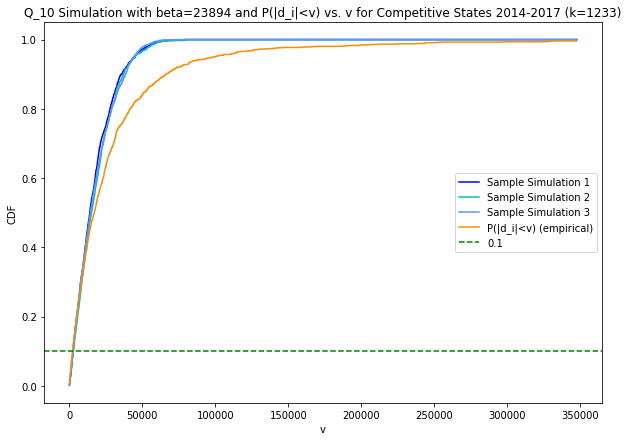

In [32]:
states_label = "Competitive States"
plt.figure(figsize=(10, 7))
plt.plot(v, ratios_sim1, label="Sample Simulation 1", color='b')
plt.plot(v, ratios_sim2, label="Sample Simulation 2", color='c')
plt.plot(v, ratios_sim3, label="Sample Simulation 3", color='cornflowerblue')
plt.plot(v, ratios2, label="P(|d_i|<v) (empirical)", color='darkorange')
plt.title("Q_%d Simulation with beta=%d and P(|d_i|<v) vs. v for %s 2014-2017 (k=%d)" % (min_x * 100, min_beta, states_label, len(df2)))
plt.xlabel("v")
plt.ylabel("CDF")
plt.axhline(y=min_x, color='g', linestyle='--', label=str(min_x))
plt.legend()
plt.show()

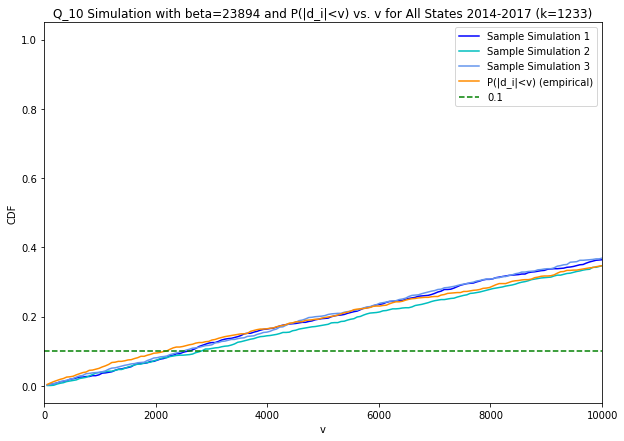

In [31]:
states_label = "All States"
plt.figure(figsize=(10, 7))
plt.plot(v, ratios_sim1, label="Sample Simulation 1", color='b')
plt.plot(v, ratios_sim2, label="Sample Simulation 2", color='c')
plt.plot(v, ratios_sim3, label="Sample Simulation 3", color='cornflowerblue')
plt.plot(v, ratios2, label="P(|d_i|<v) (empirical)", color='darkorange')
plt.title("Q_%d Simulation with beta=%d and P(|d_i|<v) vs. v for %s 2014-2017 (k=%d)" % (min_x * 100, min_beta, states_label, len(df2)))
plt.axhline(y=min_x, color='g', linestyle='--', label=str(min_x))
plt.legend()
plt.xlim((0, 10000))
plt.xlabel("v")
plt.ylabel("CDF")
plt.show()

In [29]:
run_binom_stat_test2(min_beta, df2.values)

Beta (=std): 23894
Number of T/sqrt(n) above 2 stds: 211
Proportion of T/sqrt(n) above 2 stds: 0.171
P value = 0.000000
